# All-ones or all-zeros tensors 將 tensorflow 值都設為 1 或 0

In [7]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
y = tf.ones(shape=(2, 2))
print(x,y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [10]:
x = tf.zeros(shape=(2, 1))
y = tf.zeros(shape=(2, 2))
print(x,y)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32) tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


# Random tensors 將 tensorflow 值用隨機亂數的方式

In [11]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.31125158]
 [ 2.4594078 ]
 [-0.3838243 ]], shape=(3, 1), dtype=float32)


In [12]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.54245317]
 [0.7921555 ]
 [0.6058043 ]], shape=(3, 1), dtype=float32)


In [13]:
x = tf.random.uniform(shape=(3, 3), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.8548169  0.03630292 0.8070041 ]
 [0.09809971 0.56146574 0.58918047]
 [0.21673775 0.34863305 0.8151398 ]], shape=(3, 3), dtype=float32)


# NumPy arrays are assignable 可以給值

In [17]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

# TensorFlow tensors are not assignable 不能給值

In [16]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0. 

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

# TensorFlow variable

In [18]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.6014337 ],
       [ 0.68261397],
       [-0.59570205]], dtype=float32)>


In [19]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.00836341,  0.07541748, -0.20297444],
       [-0.06136164, -1.1073318 ,  0.17065452],
       [ 0.3419709 ,  0.64621717,  0.560162  ]], dtype=float32)>


# assign 值給 v

In [21]:
v.assign(tf.ones((3, 3)))

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [22]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[3., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

# Using assign_add()

In [24]:
v.assign_add(tf.ones((3, 3))) # 每個都 + 1

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[4., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

# A few basic math operations 基本數學運算

In [25]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [27]:
def f(x):
    y = tf.sin(x) + tf.exp(-x) + 1
    return y
x = tf.Variable(1.)

with tf.GradientTape() as t:
    y = f(x)
dy_dx = t.gradient(y, x)
x,y,dy_dx

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.2093503>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.17242283>)

# Using the GradientTape

In [29]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
     result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

# Using GradientTape with constanttensor inputs

In [34]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

# Using nested gradienttapes to compute second-order gradients 使用嵌套梯度帶計算二階梯度

In [35]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


# Generating two classes of random points in a 2D plane

In [36]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [37]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

inputs

array([[ 0.37525588,  2.3109863 ],
       [ 2.0034595 ,  2.6574838 ],
       [-0.60142803,  2.3851538 ],
       ...,
       [ 2.774325  , -0.06850767],
       [ 2.1284235 , -1.469166  ],
       [ 3.473581  ,  0.375908  ]], dtype=float32)

In [38]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

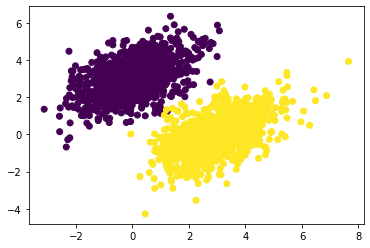

In [41]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [43]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
W,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.45208335],
        [0.39596498]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

# forward pass function

In [44]:
def model(inputs):
    return tf.matmul(inputs, W) + b

# Means quare error loss function

In [45]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# training step function

In [46]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# batch function

In [47]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.3677
Loss at step 1: 0.2847
Loss at step 2: 0.1377
Loss at step 3: 0.1094
Loss at step 4: 0.0991
Loss at step 5: 0.0920
Loss at step 6: 0.0859
Loss at step 7: 0.0804
Loss at step 8: 0.0754
Loss at step 9: 0.0708
Loss at step 10: 0.0667
Loss at step 11: 0.0629
Loss at step 12: 0.0595
Loss at step 13: 0.0564
Loss at step 14: 0.0535
Loss at step 15: 0.0510
Loss at step 16: 0.0486
Loss at step 17: 0.0465
Loss at step 18: 0.0446
Loss at step 19: 0.0428
Loss at step 20: 0.0412
Loss at step 21: 0.0397
Loss at step 22: 0.0384
Loss at step 23: 0.0372
Loss at step 24: 0.0361
Loss at step 25: 0.0351
Loss at step 26: 0.0342
Loss at step 27: 0.0334
Loss at step 28: 0.0326
Loss at step 29: 0.0319
Loss at step 30: 0.0313
Loss at step 31: 0.0307
Loss at step 32: 0.0302
Loss at step 33: 0.0298
Loss at step 34: 0.0293
Loss at step 35: 0.0289
Loss at step 36: 0.0286
Loss at step 37: 0.0283
Loss at step 38: 0.0280
Loss at step 39: 0.0277


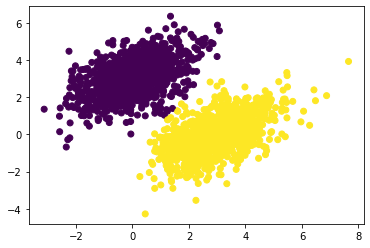

In [48]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

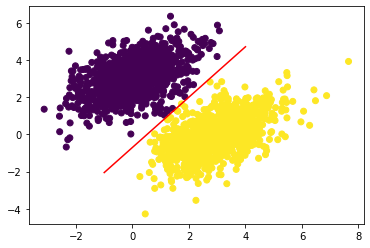

In [49]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Deep learing
# The base layer in keras

In [50]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [51]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [52]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [53]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [54]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

# compile the model
# Layer to model

In [55]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [56]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 665us/step - loss: 8.6058 - accuracy: 0.6065
Epoch 2/5
16/16 [==============================] - 0s 667us/step - loss: 8.1648 - accuracy: 0.6095
Epoch 3/5
16/16 [==============================] - 0s 633us/step - loss: 7.7968 - accuracy: 0.6155
Epoch 4/5
16/16 [==============================] - 0s 633us/step - loss: 7.4456 - accuracy: 0.6225
Epoch 5/5
16/16 [==============================] - 0s 667us/step - loss: 7.1029 - accuracy: 0.6265


In [57]:
history.history

{'loss': [8.605809211730957,
  8.164798736572266,
  7.796846866607666,
  7.445612907409668,
  7.102901458740234],
 'accuracy': [0.6065000295639038,
  0.609499990940094,
  0.6154999732971191,
  0.6225000023841858,
  0.6265000104904175]}

In [58]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
# train
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.1674 - binary_accuracy: 0.9564 - val_loss: 0.1198 - val_binary_accuracy: 0.9450
Epoch 2/5
88/88 [==============================] - 0s 951us/step - loss: 0.0727 - binary_accuracy: 0.9621 - val_loss: 0.1089 - val_binary_accuracy: 0.9533
Epoch 3/5
88/88 [==============================] - 0s 967us/step - loss: 0.0715 - binary_accuracy: 0.9557 - val_loss: 0.0340 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 982us/step - loss: 0.0750 - binary_accuracy: 0.9536 - val_loss: 0.1368 - val_binary_accuracy: 0.8783
Epoch 5/5
88/88 [==============================] - 0s 943us/step - loss: 0.0653 - binary_accuracy: 0.9643 - val_loss: 0.1284 - val_binary_accuracy: 0.9033


In [59]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[0.57745445]
 [0.5166731 ]
 [0.5382115 ]
 [0.05916107]
 [1.0642631 ]
 [0.3651879 ]
 [0.5449875 ]
 [0.10450554]
 [0.9083415 ]
 [0.4855914 ]]
